In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file (kaggle.json) that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gopeshkumarpathak/dataset-people-sentiments

dataset-people-sentiments.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q dataset-people-sentiments.zip

replace dataset_people.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

In [ ]:
# Load data
df = pd.read_csv('dataset_people.csv')

In [ ]:
import networkx as nx

G = nx.Graph()

# Add nodes
G.add_nodes_from(df['user_name'])

# Add edges (for example, based on retweets or mentions)
for _, row in df.iterrows():
    G.add_edge(row['user_name'], row['retweeted_user_name']) if row['is_retweet'] else None
    # Add more relationships as needed



In [ ]:
# Using Louvain method
from community import community_louvain

partition = community_louvain.best_partition(G)

In [ ]:
!pip install python-louvain

In [ ]:
pip install --upgrade networkx matplotlib numpy scipy

In [ ]:
from community import community_louvain

partition = community_louvain.best_partition(G)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have a graph G and a partition variable
# You should replace G and partition with your actual graph and partition data

pos = nx.spring_layout(G)

# Get a list of colors based on the partition
colors = [partition[node] for node in G.nodes()]

# Draw the graph
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow, node_size=92272)

# Show the plot
plt.show()

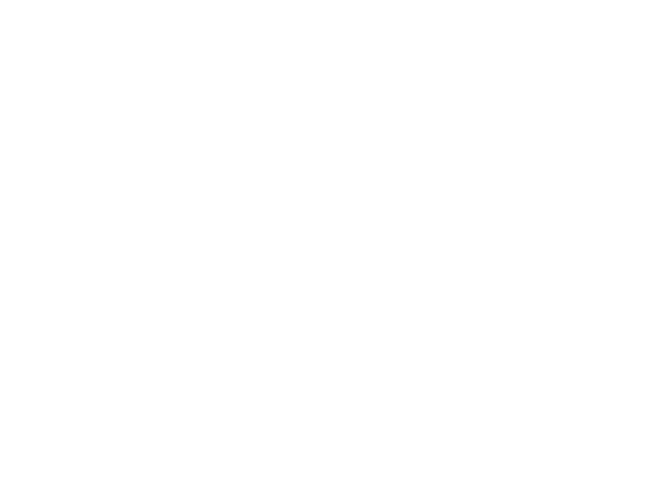

In [ ]:
import random

# Use all nodes for visualization
nodes_to_visualize = list(G.nodes())

# Create a subgraph for visualization
G_sub = G.subgraph(nodes_to_visualize)

# Visualization
pos_sub = nx.spring_layout(G_sub)
colors_sub = [partition[node] for node in G_sub.nodes()]

nx.draw(G_sub, pos_sub, node_color=colors_sub, with_labels=True, cmap=plt.cm.rainbow)
plt.show()


In [ ]:
pos = nx.circular_layout(G)  # Experiment with different layouts (circular, random, shell, etc.)


In [ ]:
!pip install pyvis

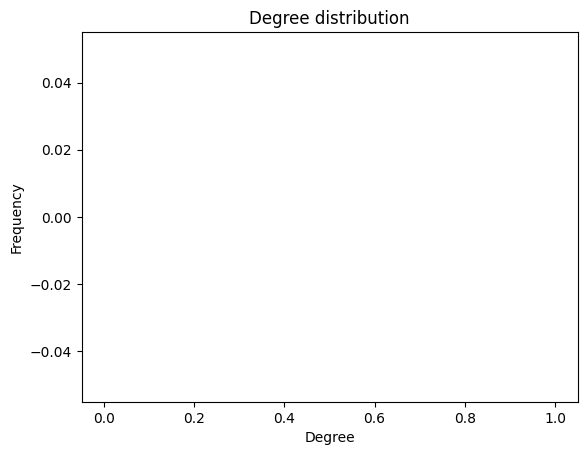

In [ ]:
# Example of degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=100, alpha=0.75)
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [ ]:
!pip install nltk


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Use the compound score as the sentiment score
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Display the sentiment scores
print(df[['text', 'sentiment']])


                              text  sentiment
0             I love this product!     0.6696
1  Not satisfied with the service.    -0.3252
2              Amazing experience!     0.6239


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['sentiment'].head(20)

0    0.6696
1   -0.3252
2    0.6239
Name: sentiment, dtype: float64

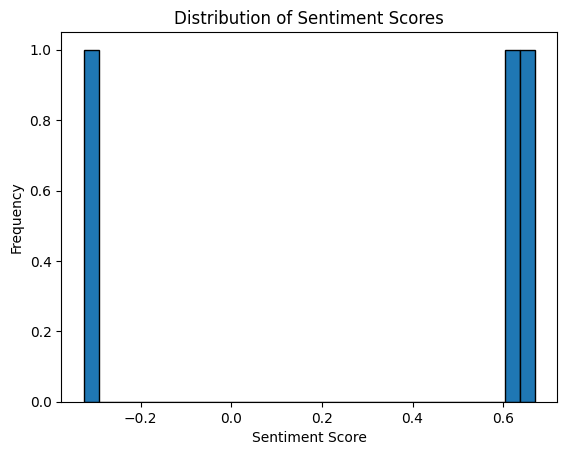

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataframe 'df'

# Plotting the histogram
plt.hist(df['sentiment'], bins=30, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


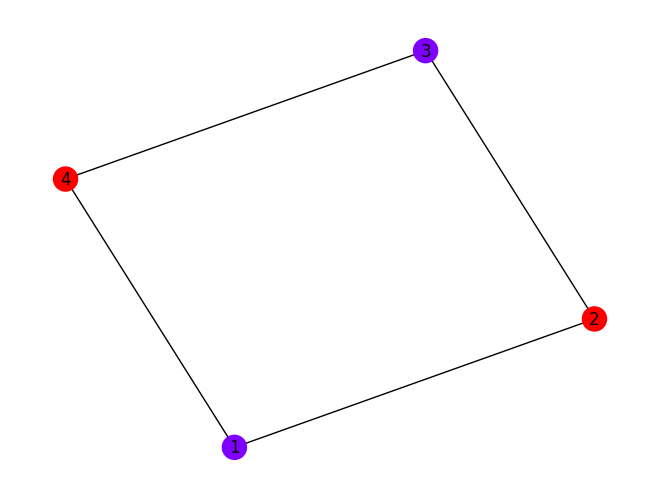

In [ ]:
# Example: Creating a simple graph for illustration purposes
import networkx as nx

G_neutral = nx.Graph()
G_neutral.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Assuming you have a partition for the nodes in G_neutral
partition_neutral = {1: 0, 2: 1, 3: 0, 4: 1}

# Visualization code
pos_neutral = nx.spring_layout(G_neutral)
colors_neutral = [partition_neutral[node] for node in G_neutral.nodes()]

nx.draw(G_neutral, pos_neutral, node_color=colors_neutral, with_labels=True, cmap=plt.cm.rainbow)
plt.show()


In [ ]:
df['neutral_user'] = (df['sentiment'].abs() < 0.1)
df['user_name'] = (df['sentiment'])

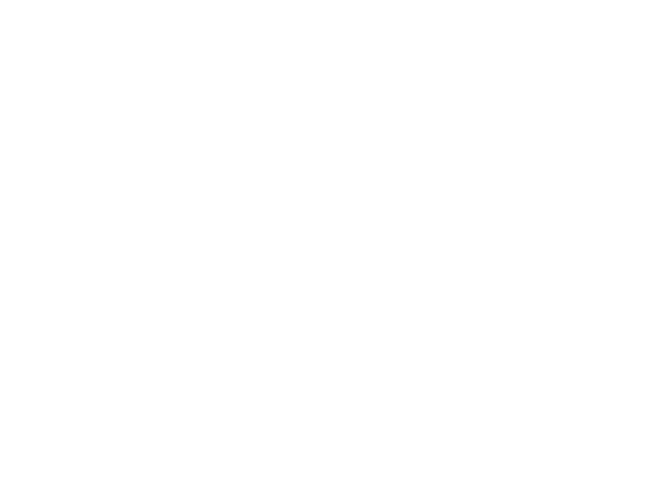

In [ ]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Filter neutral users
neutral_users = df[df['neutral_user']]['user_name'].tolist()

# Create a graph with neutral users
G_neutral = G.subgraph(neutral_users)

# Community detection
partition_neutral = community_louvain.best_partition(G_neutral)

# Visualization
pos_neutral = nx.spring_layout(G_neutral)
colors_neutral = [partition_neutral[node] for node in G_neutral.nodes()]

nx.draw(G_neutral, pos_neutral, node_color=colors_neutral, with_labels=True, cmap=plt.cm.rainbow)
plt.show()


In [ ]:
# Filter neutral users
neutral_users = df[df['neutral_user']]['user_name'].tolist()

# Create a graph with neutral users
G_neutral = G.subgraph(neutral_users)


In [ ]:
G_neutral

In [ ]:
df['positive_user'] = (df['sentiment'] > 0.1)
df['negative_user'] = (df['sentiment'] < -0.1)

In [ ]:
positive_users = df[df['positive_user']]['user_name'].tolist()
negative_users = df[df['negative_user']]['user_name'].tolist()

G_positive = G.subgraph(positive_users)
G_negative = G.subgraph(negative_users)


In [ ]:
print(len(G_positive.nodes()), len(G_negative.nodes()))


0 0


In [ ]:
pos_positive = nx.circular_layout(G_positive)
pos_negative = nx.circular_layout(G_negative)


<ipython-input-89-502d2eaba5ed>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), min(100, len(G.nodes())))


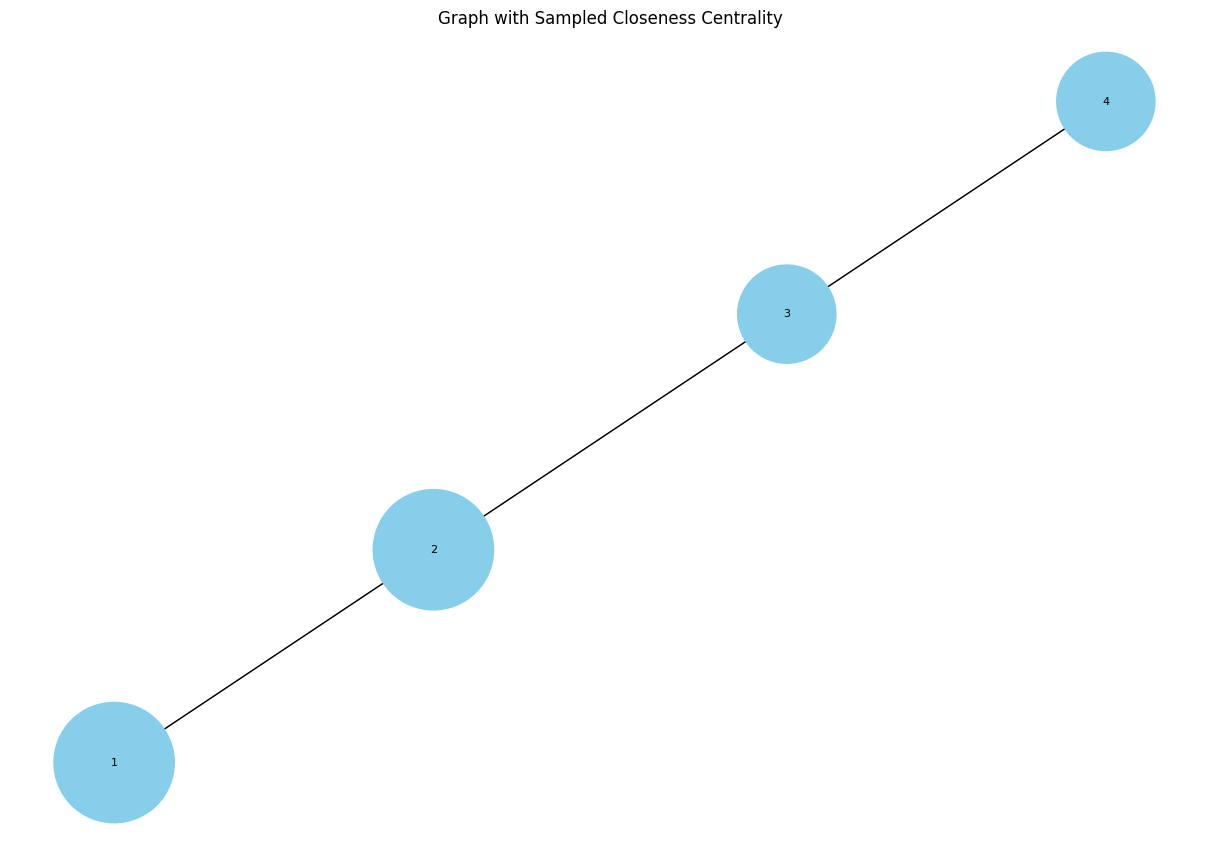

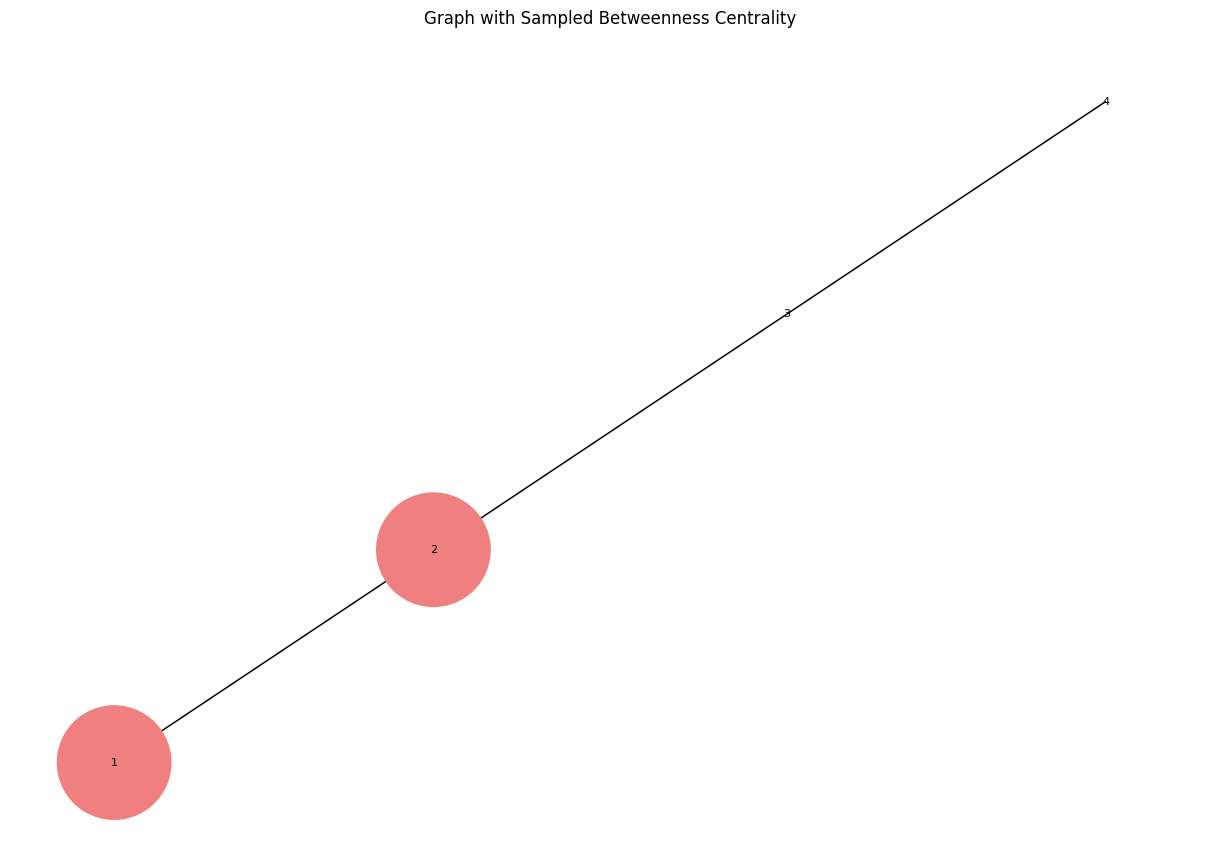

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Assuming you have already created your graph G

# Sample a subset of nodes for analysis (adjust as needed)
sampled_nodes = random.sample(G.nodes(), min(100, len(G.nodes())))

# Calculate Closeness Centrality for all nodes in the graph
closeness_centrality = nx.closeness_centrality(G)

# Calculate Betweenness Centrality for all nodes in the graph
betweenness_centrality = nx.betweenness_centrality(G)

# Extract centrality values for the sampled nodes
sampled_closeness = {node: closeness_centrality[node] for node in sampled_nodes}
sampled_betweenness = {node: betweenness_centrality[node] for node in sampled_nodes}

# Create a visualization of the graph with node sizes proportional to closeness centrality
plt.figure(figsize=(12, 8))

# Nodes
pos = nx.spring_layout(G)  # Calculate node positions
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    font_size=8,
    node_color='skyblue',
    node_size=[sampled_closeness[node] * 10000 for node in sampled_nodes]
)

# Edges
nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

plt.title("Graph with Sampled Closeness Centrality")
plt.show()

# Create a visualization of the graph with node sizes proportional to betweenness centrality
plt.figure(figsize=(12, 8))

# Nodes
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    font_size=8,
    node_color='lightcoral',
    node_size=[sampled_betweenness[node] * 10000 for node in sampled_nodes]
)

# Edges
nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

plt.title("Graph with Sampled Betweenness Centrality")
plt.show()


Number of triangles: 0


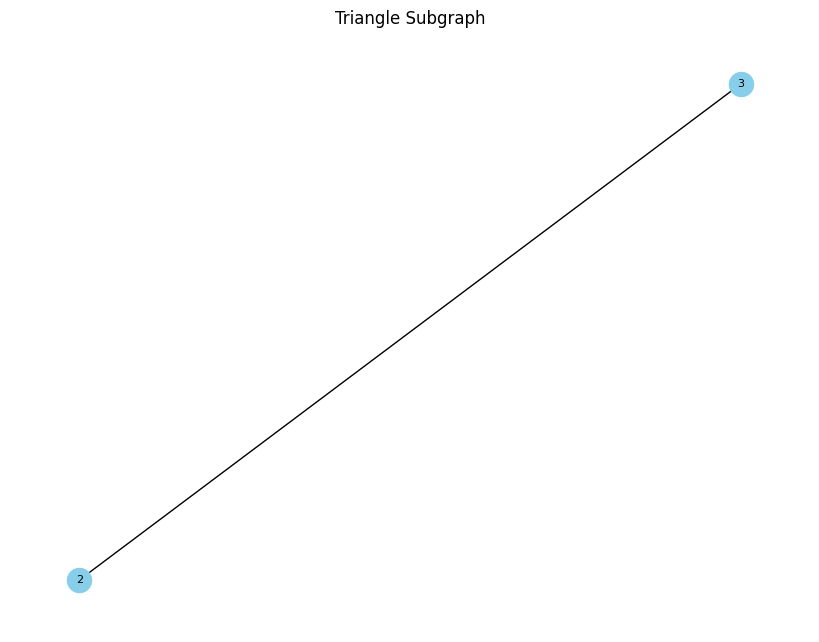

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created your graph G

# Calculate triads in the graph
triads = nx.triangles(G)

# Print the count of triangles
print(f"Number of triangles: {sum(triads.values())}")

# Visualize a subgraph formed by a triangle (adjust as needed)
triangle_nodes = [node for node, degree in G.degree() if degree >= 2]  # Nodes with degree at least 2
triangle_subgraph = G.subgraph(triangle_nodes)

# Create a visualization of the triangle subgraph
plt.figure(figsize=(8, 6))
nx.draw(triangle_subgraph, with_labels=True, font_size=8, node_color='skyblue', node_size=300)
plt.title("Triangle Subgraph")
plt.show()


In [ ]:
import networkx as nx

# Assuming you have already created your graph G

# Calculate the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the overall density
density = nx.density(G)

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Overall density: {density}")


Number of nodes: 4
Number of edges: 3
Overall density: 0.5


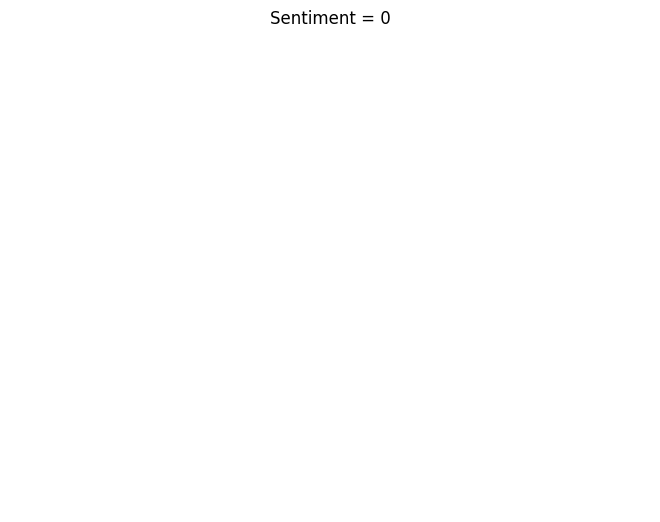

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Assuming your dataset is stored in a DataFrame named 'df'
# You can read your data into a DataFrame like this:
# df = pd.read_csv('your_dataset.csv')

# Taking a random sample of 200 rows with replacement for demonstration purposes
random.seed(42)  # Set seed for reproducibility
sample_df = df.sample(n=200, replace=True)

# Ensure 'user_name' column contains string values
sample_df['user_name'] = sample_df['user_name'].astype(str)

# Replace NaNs with empty strings in 'user_name' column
sample_df['user_name'] = sample_df['user_name'].fillna('')

# Filter rows based on 'user_name' containing 'covid-19'
sample_df = sample_df[~sample_df['user_name'].str.contains('covid-19', case=False)].copy()

# Creating a graph for sentiment=0
G_sentiment_0 = nx.Graph()

# Adding nodes with usernames based on sentiment=0
for index, row in sample_df.iterrows():
    user_name = row['user_name']
    sentiment_score = row['sentiment']

    if sentiment_score == 0:
        G_sentiment_0.add_node(user_name)

# Visualizing the graph for sentiment=0
pos_0 = nx.spring_layout(G_sentiment_0)
nx.draw(G_sentiment_0, pos_0, with_labels=True, font_size=8, node_size=100, node_color='skyblue', font_color='black', font_weight='bold')
plt.title('Sentiment = 0')
plt.show()


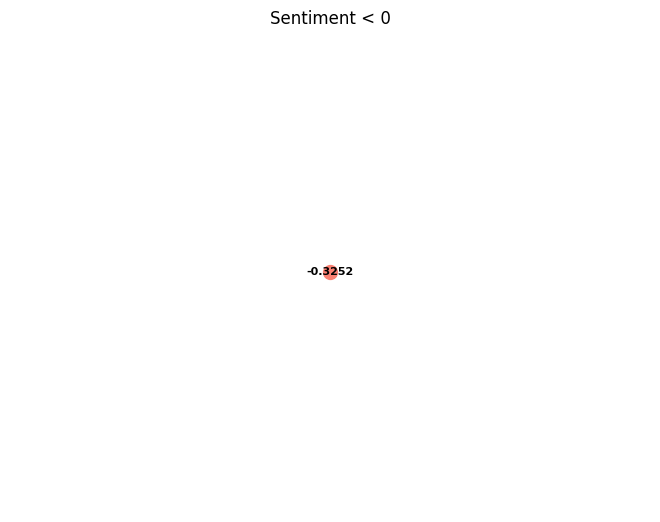

In [ ]:
# Creating a graph for sentiment < 0
G_sentiment_less_than_0 = nx.Graph()

# Adding nodes with usernames based on sentiment < 0
for index, row in sample_df.iterrows():
    user_name = row['user_name']
    sentiment_score = row['sentiment']

    if sentiment_score < 0:
        G_sentiment_less_than_0.add_node(user_name, sentiment_score=sentiment_score)

# Visualizing the graph for sentiment < 0
pos_less_than_0 = nx.spring_layout(G_sentiment_less_than_0)
nx.draw(G_sentiment_less_than_0, pos_less_than_0, with_labels=True, font_size=8, node_size=100, node_color='salmon', font_color='black', font_weight='bold')
plt.title('Sentiment < 0')
plt.show()


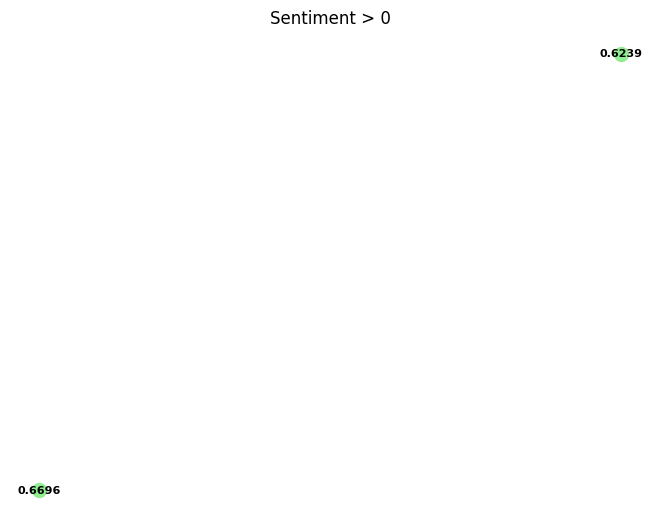

In [ ]:
# Creating a graph for sentiment > 0
G_sentiment_greater_than_0 = nx.Graph()

# Adding nodes with usernames based on sentiment > 0
for index, row in sample_df.iterrows():
    user_name = row['user_name']
    sentiment_score = row['sentiment']

    if sentiment_score > 0:
        G_sentiment_greater_than_0.add_node(user_name, sentiment_score=sentiment_score)

# Visualizing the graph for sentiment > 0
pos_greater_than_0 = nx.spring_layout(G_sentiment_greater_than_0)
nx.draw(G_sentiment_greater_than_0, pos_greater_than_0, with_labels=True, font_size=8, node_size=100, node_color='lightgreen', font_color='black', font_weight='bold')
plt.title('Sentiment > 0')
plt.show()


In [ ]:
pip install python-louvain --upgrade


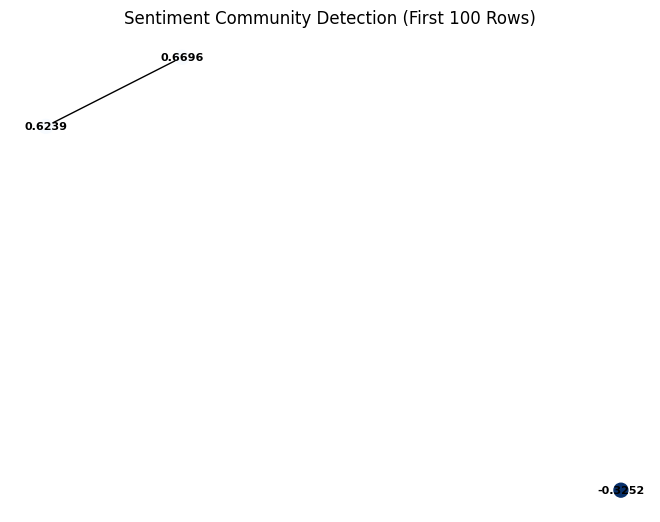

In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import girvan_newman
from community import community_louvain  # Louvain community detection
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
# You can read your data into a DataFrame like this:
# df = pd.read_csv('your_dataset.csv')

# Take only the first 100 rows
df_subset = df.head(100)

# Creating a graph with usernames and sentiment scores
G = nx.Graph()
for index, row in df_subset.iterrows():
    user_name = row['user_name']
    sentiment_score = row['sentiment']
    G.add_node(user_name, sentiment_score=sentiment_score)

# Adding edges based on some criteria (e.g., users who mentioned each other)
# You may need to customize this based on your dataset and use case
# For this example, let's add edges between users with similar sentiment scores
threshold = 0.1  # Adjust the threshold based on your needs
for u, u_data in G.nodes(data=True):
    for v, v_data in G.nodes(data=True):
        if u != v and abs(u_data['sentiment_score'] - v_data['sentiment_score']) < threshold:
            G.add_edge(u, v)

# Applying the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Adding the community information as a node attribute
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

# Visualizing the graph with community colors
pos = nx.spring_layout(G)
colors = [G.nodes[node]['community'] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors, font_color='black', font_weight='bold')
plt.title('Sentiment Community Detection (First 100 Rows)')
plt.show()


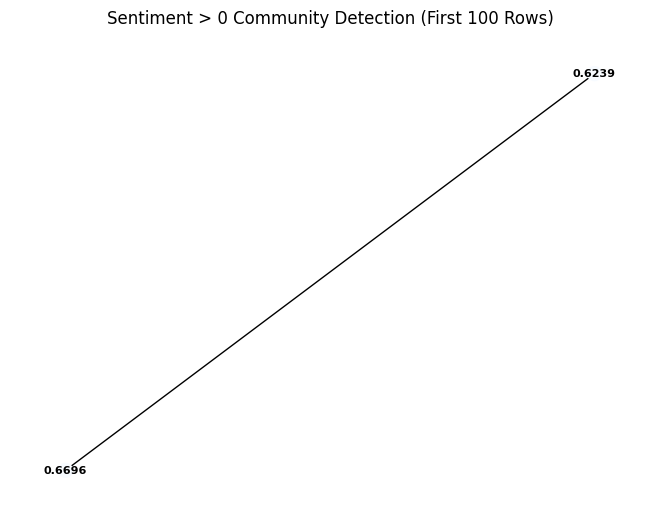

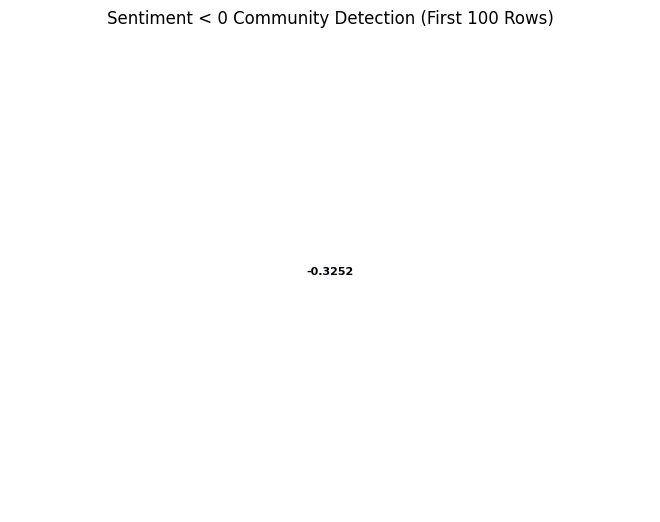

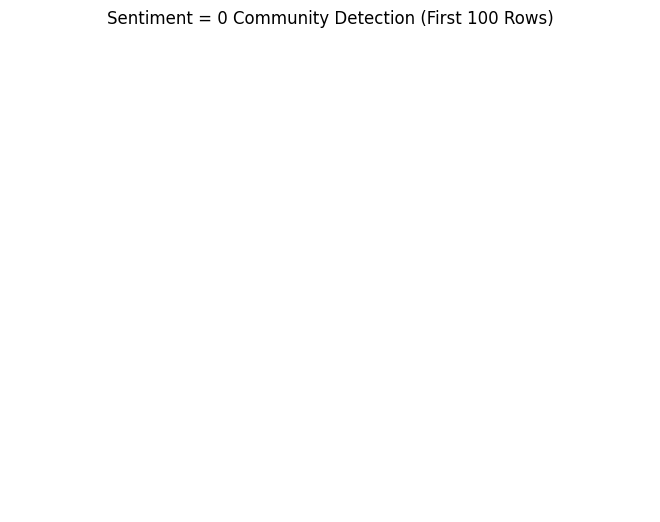

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Assuming your dataset is stored in a DataFrame named 'df'
# You can read your data into a DataFrame like this:
# df = pd.read_csv('your_dataset.csv')

# Take only the first 100 rows
df_subset = df.head(100)

# Creating separate graphs for sentiment > 0, sentiment < 0, and sentiment = 0
G_sentiment_greater_than_0 = nx.Graph()
G_sentiment_less_than_0 = nx.Graph()
G_sentiment_0 = nx.Graph()

# Adding nodes with usernames based on sentiment
for index, row in df_subset.iterrows():
    user_name = row['user_name']
    sentiment_score = row['sentiment']

    if sentiment_score > 0:
        G_sentiment_greater_than_0.add_node(user_name, sentiment_score=sentiment_score)
    elif sentiment_score < 0:
        G_sentiment_less_than_0.add_node(user_name, sentiment_score=sentiment_score)
    else:
        G_sentiment_0.add_node(user_name)

# Adding edges based on some criteria (e.g., users who mentioned each other)
# You may need to customize this based on your dataset and use case
# For this example, let's add edges between users with similar sentiment scores
threshold = 0.1  # Adjust the threshold based on your needs

# Function to add edges to the graph
def add_edges(G, threshold):
    for u, u_data in G.nodes(data=True):
        for v, v_data in G.nodes(data=True):
            if u != v and abs(u_data.get('sentiment_score', 0) - v_data.get('sentiment_score', 0)) < threshold:
                G.add_edge(u, v)

# Adding edges to each sentiment graph
add_edges(G_sentiment_greater_than_0, threshold)
add_edges(G_sentiment_less_than_0, threshold)
add_edges(G_sentiment_0, threshold)

# Applying the Louvain algorithm for community detection for sentiment > 0
partition_greater_than_0 = community_louvain.best_partition(G_sentiment_greater_than_0)
for node, community_id in partition_greater_than_0.items():
    G_sentiment_greater_than_0.nodes[node]['community'] = community_id

# Applying the Louvain algorithm for community detection for sentiment < 0
partition_less_than_0 = community_louvain.best_partition(G_sentiment_less_than_0)
for node, community_id in partition_less_than_0.items():
    G_sentiment_less_than_0.nodes[node]['community'] = community_id

# Applying the Louvain algorithm for community detection for sentiment = 0
partition_0 = community_louvain.best_partition(G_sentiment_0)
for node, community_id in partition_0.items():
    G_sentiment_0.nodes[node]['community'] = community_id

# Visualizing the graph with community colors for sentiment > 0
pos_greater_than_0 = nx.spring_layout(G_sentiment_greater_than_0)
colors_greater_than_0 = [G_sentiment_greater_than_0.nodes[node]['community'] for node in G_sentiment_greater_than_0.nodes]
nx.draw(G_sentiment_greater_than_0, pos_greater_than_0, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors_greater_than_0, font_color='black', font_weight='bold')
plt.title('Sentiment > 0 Community Detection (First 100 Rows)')
plt.show()

# Visualizing the graph with community colors for sentiment < 0
pos_less_than_0 = nx.spring_layout(G_sentiment_less_than_0)
colors_less_than_0 = [G_sentiment_less_than_0.nodes[node]['community'] for node in G_sentiment_less_than_0.nodes]
nx.draw(G_sentiment_less_than_0, pos_less_than_0, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors_less_than_0, font_color='black', font_weight='bold')
plt.title('Sentiment < 0 Community Detection (First 100 Rows)')
plt.show()

# Visualizing the graph with community colors for sentiment = 0
pos_0 = nx.spring_layout(G_sentiment_0)
colors_0 = [G_sentiment_0.nodes[node]['community'] for node in G_sentiment_0.nodes]
nx.draw(G_sentiment_0, pos_0, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors_0, font_color='black', font_weight='bold')
plt.title('Sentiment = 0 Community Detection (First 100 Rows)')
plt.show()


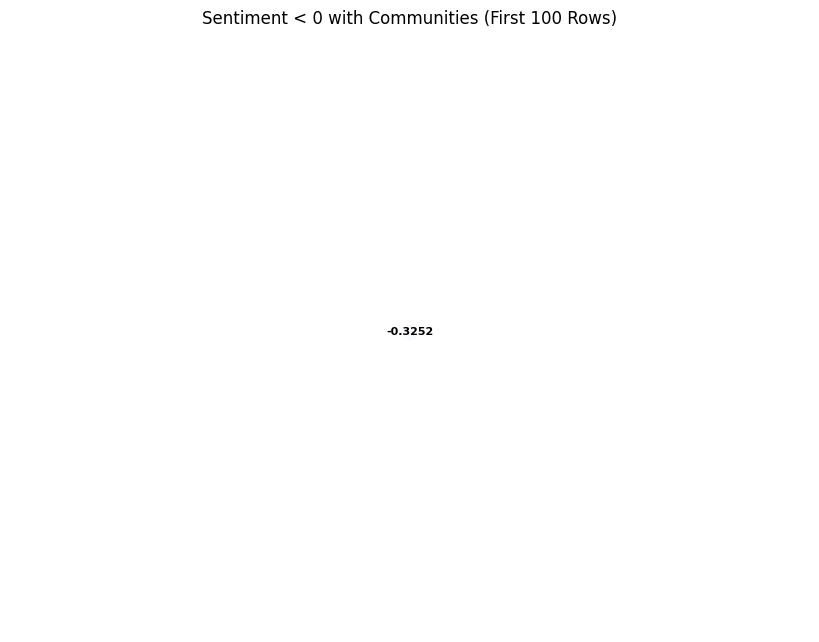

In [ ]:
plt.figure(figsize=(8, 6))
pos_less_than_0 = nx.spring_layout(G_sentiment_less_than_0)
colors_less_than_0 = [G_sentiment_less_than_0.nodes[node]['community'] for node in G_sentiment_less_than_0.nodes]
nx.draw(G_sentiment_less_than_0, pos_less_than_0, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors_less_than_0, font_color='black', font_weight='bold')
plt.title('Sentiment < 0 with Communities (First 100 Rows)')
plt.show()

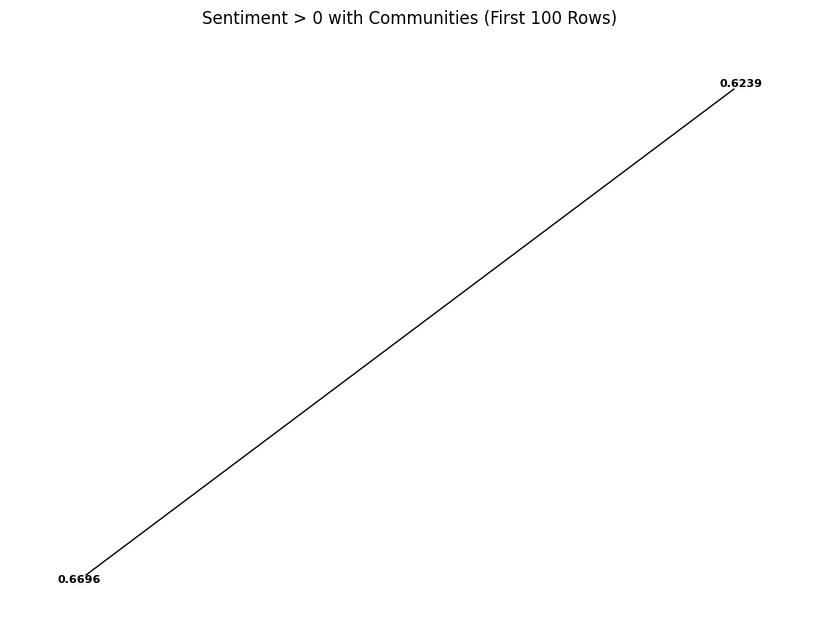

In [ ]:
plt.figure(figsize=(8, 6))
pos_greater_than_0 = nx.spring_layout(G_sentiment_greater_than_0)
colors_greater_than_0 = [G_sentiment_greater_than_0.nodes[node]['community'] for node in G_sentiment_greater_than_0.nodes]
nx.draw(G_sentiment_greater_than_0, pos_greater_than_0, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors_greater_than_0, font_color='black', font_weight='bold')
plt.title('Sentiment > 0 with Communities (First 100 Rows)')
plt.show()

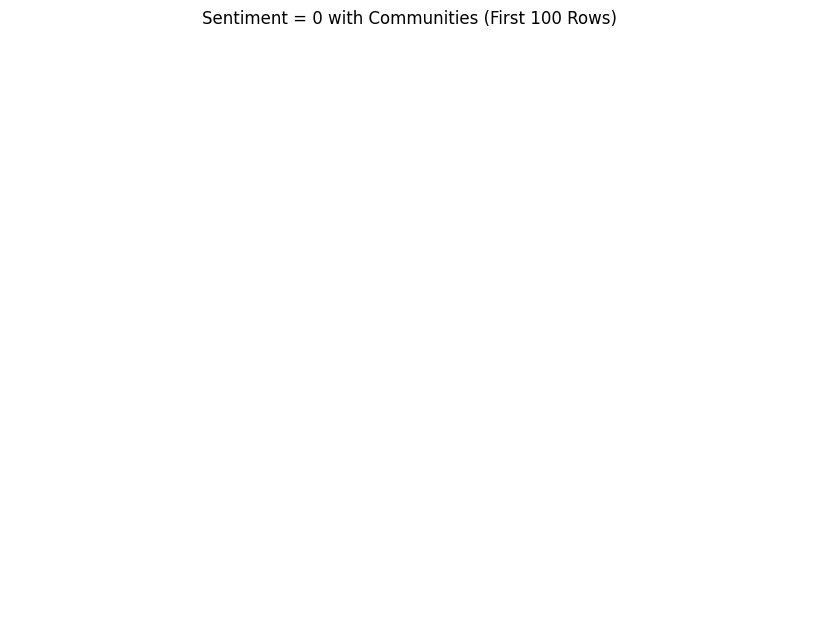

In [ ]:
plt.figure(figsize=(8, 6))
pos_0 = nx.spring_layout(G_sentiment_0)
colors_0 = [G_sentiment_0.nodes[node]['community'] for node in G_sentiment_0.nodes]
nx.draw(G_sentiment_0, pos_0, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors_0, font_color='black', font_weight='bold')
plt.title('Sentiment = 0 with Communities (First 100 Rows)')
plt.show()

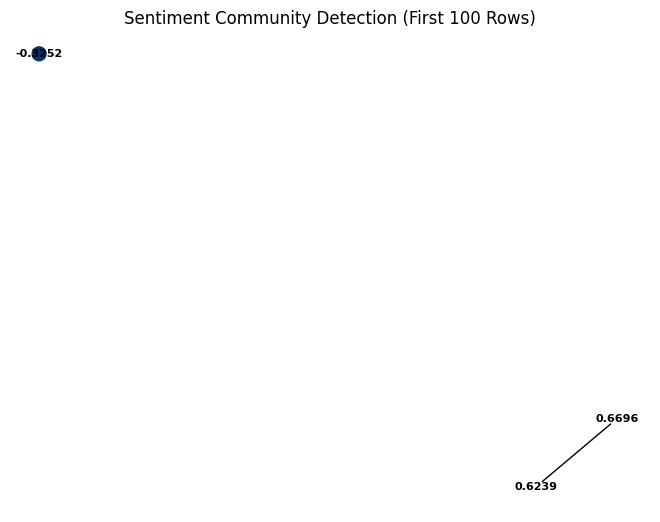

In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain  # Louvain community detection
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
# You can read your data into a DataFrame like this:
# df = pd.read_csv('your_dataset.csv')

# Take only the first 100 rows
df_subset = df.head(100)

# Creating a graph with usernames and sentiment scores
G = nx.Graph()
for index, row in df_subset.iterrows():
    user_name = row['user_name']
    sentiment_score = row['sentiment']
    G.add_node(user_name, sentiment_score=sentiment_score)

# Adding edges based on some criteria (e.g., users who mentioned each other)
# You may need to customize this based on your dataset and use case
# For this example, let's add edges between users with similar sentiment scores
threshold = 0.1  # Adjust the threshold based on your needs
for u, u_data in G.nodes(data=True):
    for v, v_data in G.nodes(data=True):
        if u != v and abs(u_data.get('sentiment_score', 0) - v_data.get('sentiment_score', 0)) < threshold:
            G.add_edge(u, v)

# Applying the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Adding the community information as a node attribute
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

# Visualizing the graph with community colors
pos = nx.spring_layout(G)
colors = [G.nodes[node]['community'] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100, cmap=plt.cm.Blues, node_color=colors, font_color='black', font_weight='bold')
plt.title('Sentiment Community Detection (First 100 Rows)')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
# You can read your data into a DataFrame like this:
# df = pd.read_csv('your_dataset.csv')

# Check if the 'date' column exists in the DataFrame
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['sentiment'].resample('D').mean().plot(title='Average Sentiment Over Time')
    plt.show()
else:
    print("The 'date' column does not exist in the DataFrame.")



The 'date' column does not exist in the DataFrame.


In [ ]:
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values]

plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Degree Distribution of Nodes')
plt.show()
